### csv 파일을 로드에서 결합
1. csv 폴더에 transaction_1, transaction_2, transaction_detail_1, transaction_detail_2 파일 4개를 로드
2. transaction_1, transaction_2 데이터프레임을 단순한 행 결합
3. transaction_detail_1, transaction_detail_2 데이터프레임도 단순한 행 결합
4. 2번과정에서 나온 데이터프레임과 3번과정에서 나온 데이터프레임을 특정 조건을 가지고 열 결합

In [1]:
import pandas as pd

In [2]:
transaction_1 = pd.read_csv("../csv/transaction_1.csv")
transaction_2 = pd.read_csv("../csv/transaction_2.csv")
transaction_detail_1 = pd.read_csv("../csv/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("../csv/transaction_detail_2.csv")

In [3]:
transaction_1

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758


In [4]:
transaction_detail_1

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1


In [5]:
## 데이터프레임 행 추가 단순 결합
transaction = pd.concat([transaction_1, transaction_2], 
axis=0, ignore_index=True)

transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], 
axis=0, ignore_index=True)

In [9]:
## 특정 조건을 가지고 열 결합
join_data = pd.merge(transaction, transaction_detail, 
on='transaction_id', how='inner')

join_data.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [10]:
## payment_date 시계열 데이터 변환
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])

In [11]:
join_data.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [12]:
join_data["payment_date"]

0      2019-02-01 01:36:57
1      2019-02-01 01:37:23
2      2019-02-01 02:34:19
3      2019-02-01 02:47:23
4      2019-02-01 04:33:46
               ...        
7139   2019-07-31 21:20:44
7140   2019-07-31 21:52:48
7141   2019-07-31 23:35:25
7142   2019-07-31 23:39:35
7143   2019-07-31 23:41:38
Name: payment_date, Length: 7144, dtype: datetime64[ns]

### 데이터 결합
1. customer_master, item_master 파일 로드 
2. join_data 특정 조건에 맞게 열 추가
3. 결합이 된 데이터에서 quantity컬럼, item_price컬럼 존재 두개의 곱을 하여 새로운 파생변수 total_price 생성
4. 6개의 csv파일이 결합된 데이터프레임에 payment_date컬럼의 값을 가지고 payment_month 새로운 파생변수에 들어갈 값은 년-월
5. payment_month을 기준으로 그룹화 total_price 합
6. 시각화

In [13]:
## 파일 로드 
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master = pd.read_csv("../csv/item_master.csv")

In [16]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [15]:
## 데이터 결합
total_data = pd.merge(join_data, customer_master, on="customer_id", how="left")

In [17]:
total_data = pd.merge(total_data, item_master, on='item_id', how='left')

In [ ]:
total_data.head(1)

In [ ]:
## total_price 파생변수 생성 -> quantity * item_price
total_data["total_price"] = total_data["quantity"] * total_data["item_price"]
total_data.head(1)

In [ ]:
## payment_month 새로운 파생변수 생성 -> payment_date에서 년과 월만 추출해서 값을 삽입
total_data["payment_month"] = total_data["payment_date"].dt.strftime("%Y-%m")
total_data.head(1)

In [ ]:
## payment_month기준으로 그룹화 하여서 total_price의 합을 추출 -> 시각화
group_data = total_data.groupby("payment_month").sum()["total_price"]
group_data

In [23]:
import matplotlib.pyplot as plt

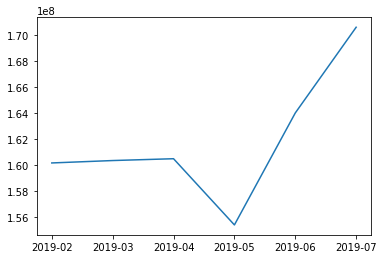

In [26]:
plt.plot(group_data)
plt.show()